# Working with Pandas DataFrames in Python

Part of: Data Analysis and Visualization in Python for EcologistsData Analysis and Visualization in Python for Ecologists (**Data Carpentry**)

From: https://datacarpentry.org/python-ecology-lesson/02-starting-with-data/index.htmlhttps://datacarpentry.org/python-ecology-lesson/02-starting-with-data/index.html

teaching: 30 mins
exercises: 30 mins

Questions:
- "How can I import data in Python?"
- "What is Pandas?"
- "Why should I use Pandas to work with data?"
    
Objectives:
- "Navigate the workshop directory and download a dataset."
- "Explain what a library is and what libraries are used for."
- "Describe what the Python Data Analysis Library (Pandas) is."
- "Load the Python Data Analysis Library (Pandas)."
- "Use `read_csv` to read tabular data into Python."
- "Describe what a DataFrame is in Python."
- "Access and summarize data stored in a DataFrame."
- "Define indexing as it relates to data structures."
- "Perform basic mathematical operations and summary statistics on data in a Pandas DataFrame."
- "Create simple plots."
    
Key points:
- "Libraries enable us to extend the functionality of Python."
- "Pandas is a popular library for working with data."
- "A Dataframe is a Pandas data structure that allows one to access data by column (name or index) or row."
- "Aggregating data using the `groupby()` function enables you to generate useful summaries of data quickly."
- "Plots can be created from DataFrames or subsets of data that have been generated with `groupby()`."
    


We can automate the process of performing data manipulations in Python. It's efficient to spend time
building the code to perform these tasks because once it's built, we can use it
over and over on different datasets that use a similar format. This makes our
methods easily reproducible. We can also easily share our code with colleagues
and they can replicate the same analysis.

### Starting in the same spot

To help the lesson run smoothly, let's ensure everyone is in the same directory.
This should help us avoid path and file name issues. At this time please
navigate to the workshop directory. If you are working in Jupyter Notebook be sure
that you start your notebook in the workshop directory.

A quick aside that there are Python libraries like [OS Library][os-lib] that can work with our
directory structure, however, that is not our focus today.

### Our Data

For this lesson, we will be using the Portal Teaching data, a subset of the data
from Ernst et al
[Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal,
Arizona, USA][ernst].

We will be using files from the [Portal Project Teaching Database][pptd].
This section will use the `surveys.csv` file that can be downloaded here:
[https://ndownloader.figshare.com/files/2292172][figshare-ndownloader]

We are studying the species and weight of animals caught in sites in our study
area. The dataset is stored as a `.csv` file: each row holds information for a
single animal, and the columns represent:

| Column           | Description                        |
|------------------|------------------------------------|
| record_id        | Unique id for the observation      |
| month            | month of observation               |
| day              | day of observation                 |
| year             | year of observation                |
| plot_id          | ID of a particular site            |
| species_id       | 2-letter code                      |
| sex              | sex of animal ("M", "F")           |
| hindfoot_length  | length of the hindfoot in mm       |
| weight           | weight of the animal in grams      |


The first few rows of our first file look like this:

```
record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
1,7,16,1977,2,NL,M,32,
2,7,16,1977,3,NL,M,33,
3,7,16,1977,2,DM,F,37,
4,7,16,1977,7,DM,M,36,
5,7,16,1977,3,DM,M,35,
6,7,16,1977,1,PF,M,14,
7,7,16,1977,2,PE,F,,
8,7,16,1977,1,DM,M,37,
9,7,16,1977,1,DM,F,34,
```


In [1]:
# Download the file
import requests
url = "https://ndownloader.figshare.com/files/2292172"
content = requests.get(url).text

datafile = "surveys.csv"
with open(datafile, "w") as csv:
    csv.write(content)

In [2]:
import pandas as pd

Each time we call a function that's in a library, we use the syntax
`LibraryName.FunctionName`. Adding the library name with a `.` before the
function name tells Python where to find the function. In the example above, we
have imported Pandas as `pd`. This means we don't have to type out `pandas` each
time we call a Pandas function.


# Reading CSV Data Using Pandas

We will begin by locating and reading our survey data which are in CSV format. CSV stands for
Comma-Separated Values and is a common way to store formatted data. Other symbols may also be used, so
you might see tab-separated, colon-separated or space separated files. It is quite easy to replace
one separator with another, to match your application. The first line in the file often has headers
to explain what is in each column. CSV (and other separators) make it easy to share data, and can be
imported and exported from many applications, including Microsoft Excel. For more details on CSV
files, see the [Data Organisation in Spreadsheets][spreadsheet-lesson5] lesson.
We can use Pandas' `read_csv` function to pull the file directly into a [DataFrame][pd-dataframe].

## So What's a DataFrame?

A DataFrame is a 2-dimensional data structure that can store data of different
types (including characters, integers, floating point values, factors and more)
in columns. It is similar to a spreadsheet or an SQL table or the `data.frame` in
R. A DataFrame always has an index (0-based). An index refers to the position of
an element in the data structure.

In [3]:
# Note that pd.read_csv is used because we imported pandas as pd
pd.read_csv(datafile)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


We can see that there were 35,549 rows parsed. Each row has 9
columns. The first column is the index of the DataFrame. The index is used to
identify the position of the data, but it is not an actual column of the DataFrame.
It looks like  the `read_csv` function in Pandas  read our file properly. However,
we haven't saved any data to memory so we can work with it. We need to assign the
DataFrame to a variable. Remember that a variable is a name for a value, such as `x`,
or  `data`. We can create a new  object with a variable name by assigning a value to it using `=`.

Let's call the imported survey data `surveys_df`:

In [4]:
surveys_df = pd.read_csv(datafile)

Notice when you assign the imported DataFrame to a variable, Python does not
produce any output on the screen. We can view the value of the `surveys_df`
object by typing its name into the Python command prompt.

In [5]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


Note: if the output is too wide to print on your narrow terminal window, you may see something
slightly different as the large set of data scrolls past. You may see simply the last column
of data.

Never fear, all the data is there, if you scroll up. Selecting just a few rows, so it is
easier to fit on one window, you can see that pandas has neatly formatted the data to fit
our screen:Never fear, all the data is there, if you scroll up. Selecting just a few rows, so it is
easier to fit on one window, you can see that pandas has neatly formatted the data to fit
our screen:

In [19]:
surveys_df.head() # The head() method displays the first several lines of a file. It
                  # is discussed below.

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


## Exploring our Species Survey Data

Again, we can use the `type` function to see what kind of thing `surveys_df` is:

In [20]:
type(surveys_df)

pandas.core.frame.DataFrame

As expected, it's a DataFrame (or, to use the full name that Python uses to refer
to it internally, a `pandas.core.frame.DataFrame`).

What kind of things does `surveys_df` contain? DataFrames have an attribute
called `dtypes` that answers this:

In [21]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

All the values in a column have the same type. For example, months have type
`int64`, which is a kind of integer. Cells in the month column cannot have
fractional values, but the weight and hindfoot_length columns can, because they
have type `float64`. The `object` type doesn't have a very helpful name, but in
this case it represents strings (such as 'M' and 'F' in the case of sex).

We'll talk a bit more about what the different formats mean in a different lesson.

### Useful Ways to View DataFrame objects in Python

There are many ways to summarize and access the data stored in DataFrames,
using attributes and methods provided by the DataFrame object.

To access an attribute, use the DataFrame object name followed by the attribute
name `df_object.attribute`. Using the DataFrame `surveys_df` and attribute
`columns`, an index of all the column names in the DataFrame can be accessed
with `surveys_df.columns`.

Methods are called in a similar fashion using the syntax `df_object.method()`.
As an example, `surveys_df.head()` gets the first few rows in the DataFrame
`surveys_df` using **the `head()` method**. With a method, we can supply extra
information in the parens to control behaviour.

Let's look at the data using these.

> ## Challenge - DataFrames
>
> Using our DataFrame `surveys_df`, try out the attributes & methods below to see
> what they return.
>
> 1. `surveys_df.columns`
> 2. `surveys_df.shape` Take note of the output of `shape` - what format does it
>    return the shape of the DataFrame in?
>
>    HINT: [More on tuples, here][python-datastructures].
> 3. `surveys_df.head()` Also, what does `surveys_df.head(15)` do?
> 4. `surveys_df.tail()`

## Calculating Statistics From Data In A Pandas DataFrame

We've read our data into Python. Next, let's perform some quick summary
statistics to learn more about the data that we're working with. We might want
to know how many animals were collected in each site, or how many of each
species were caught. We can perform summary stats quickly using groups. But
first we need to figure out what we want to group by.

Let's begin by exploring our data:

In [22]:
# Look at the column names
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

Let's get a list of all the species. The `pd.unique` function tells us all of
the unique values in the `species_id` column.

In [23]:
pd.unique(surveys_df['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

> ## Challenge - Statistics
>
> 1. Create a list of unique site ID's ("plot_id") found in the surveys data. Call it
>   `site_names`. How many unique sites are there in the data? How many unique
>   species are in the data?
>
> 2. What is the difference between `len(site_names)` and `surveys_df['plot_id'].nunique()`?

# Groups in Pandas

We often want to calculate summary statistics grouped by subsets or attributes
within fields of our data. For example, we might want to calculate the average
weight of all individuals per site.

We can calculate basic statistics for all records in a single column using the
syntax below:

In [24]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

We can also extract one specific metric if we wish:

```
surveys_df['weight'].min()
surveys_df['weight'].max()
surveys_df['weight'].mean()
surveys_df['weight'].std()
surveys_df['weight'].count()
```

But if we want to summarize by one or more variables, for example sex, we can
use **Pandas' `.groupby` method**. Once we've created a groupby DataFrame, we
can quickly calculate summary statistics by a group of our choice.

In [25]:
# Group data by sex
grouped_data = surveys_df.groupby('sex')

The **pandas function `describe`** will return descriptive stats including: mean,
median, max, min, std and count for a particular column in the data. Pandas'
`describe` function will only return summary values for columns containing
numeric data.

In [26]:
# Summary statistics for all numeric columns by sex
grouped_data.describe()
# Provide the mean for each numeric column by sex
grouped_data.mean()

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,29.709578,42.995379


The `groupby` command is powerful in that it allows us to quickly generate
summary stats.

> ## Challenge - Summary Data
>
> 1. How many recorded individuals are female `F` and how many male `M`?
> 2. What happens when you group by two columns using the following syntax and
>    then calculate mean values?
>   - `grouped_data2 = surveys_df.groupby(['plot_id', 'sex'])`
>   - `grouped_data2.mean()`
> 3. Summarize weight values for each site in your data. HINT: you can use the
>   following syntax to only create summary statistics for one column in your data.
>   `by_site['weight'].describe()`
>
>
>> ## Did you get #3 right?
>> **A Snippet of the Output from challenge 3 looks like:**
>>
>> ```
>>  site
>>  1     count    1903.000000
>>        mean       51.822911
>>        std        38.176670
>>        min         4.000000
>>        25%        30.000000
>>        50%        44.000000
>>        75%        53.000000
>>        max       231.000000
>>          ...
>> ```

## Quickly Creating Summary Counts in Pandas

Let's next count the number of samples for each species. We can do this in a few
ways, but we'll use `groupby` combined with **a `count()` method**.

In [27]:
# Count the number of samples by species
species_counts = surveys_df.groupby('species_id')['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


Or, we can also count just the rows that have the species "DO":

In [28]:
surveys_df.groupby('species_id')['record_id'].count()['DO']

3027

> ## Challenge - Make a list
>
>  What's another way to create a list of species and associated `count` of the
>  records in the data? Hint: you can perform `count`, `min`, etc. functions on
>  groupby DataFrames in the same way you can perform them on regular DataFrames.

## Basic Math Functions

If we wanted to, we could perform math on an entire column of our data. For
example let's multiply all weight values by 2. A more practical use of this might
be to normalize the data according to a mean, area, or some other value
calculated from our data.

In [29]:
# Multiply all weight values by 2
surveys_df['weight']*2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, Length: 35549, dtype: float64

# Quick & Easy Plotting Data Using Pandas

We can plot our summary stats using Pandas, too.

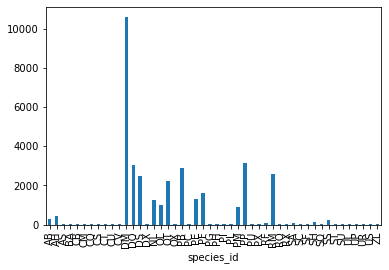

In [30]:
# Make sure figures appear inline in Ipython Notebook
%matplotlib inline
# Create a quick bar chart
species_counts.plot(kind='bar');

Count per species site

We can also look at how many animals were captured in each site:

<AxesSubplot:xlabel='plot_id'>

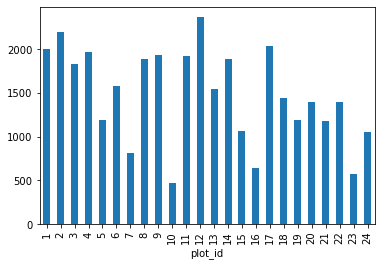

In [31]:
total_count = surveys_df.groupby('plot_id')['record_id'].nunique()
# Let's plot that too
total_count.plot(kind='bar')

> ## Challenge - Plots
>
> 1. Create a plot of average weight across all species per site.
> 2. Create a plot of total males versus total females for the entire dataset.

> ## Summary Plotting Challenge
>
> Create a stacked bar plot, with weight on the Y axis, and the stacked variable
> being sex. The plot should show total weight by sex for each site. Some
> tips are below to help you solve this challenge:
>
> * For more information on pandas plots, see [pandas' documentation page on visualization][pandas-plot].
> * You can use the code that follows to create a stacked bar plot but the data to stack
>  need to be in individual columns.  Here's a simple example with some data where
>  'a', 'b', and 'c' are the groups, and 'one' and 'two' are the subgroups.
>
> ```
> d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
> pd.DataFrame(d)
> ```
>
> shows the following data
>
> ```
>       one  two
>   a    1    1
>   b    2    2
>   c    3    3
>   d  NaN    4
> ```
>
> We can plot the above with
>
> ```
> # Plot stacked data so columns 'one' and 'two' are stacked
> my_df = pd.DataFrame(d)
> my_df.plot(kind='bar', stacked=True, title="The title of my graph")
> ```
>
> * You can use the `.unstack()` method to transform grouped data into columns
> for each plotting.  Try running `.unstack()` on some DataFrames above and see
> what it yields.
>
> Start by transforming the grouped data (by site and sex) into an unstacked layout, then create a stacked plot.
>

>> ## Solution to Summary Challenge
>>
>> First we group data by site and by sex, and then calculate a total for each site.
>>
>> ```
>> by_site_sex = surveys_df.groupby(['plot_id', 'sex'])
>> site_sex_count = by_site_sex['weight'].sum()
>> ```
>>
>> This calculates the sums of weights for each sex within each site as a table
>>
>> ```
>> site  sex
>> plot_id  sex
>> 1        F      38253
>>          M      59979
>> 2        F      50144
>>          M      57250
>> 3        F      27251
>>          M      28253
>> 4        F      39796
>>          M      49377
>> <other sites removed for brevity>
>> ```
>>
>> Below we'll use `.unstack()` on our grouped data to figure out the total weight that each sex contributed to each site.
>>
>> ```
>> by_site_sex = surveys_df.groupby(['plot_id', 'sex'])
>> site_sex_count = by_site_sex['weight'].sum()
>> site_sex_count.unstack()
>> ```
>>
>> The `unstack` method above will display the following output:
>>
>> ```
>> sex          F      M
>> plot_id
>> 1        38253  59979
>> 2        50144  57250
>> 3        27251  28253
>> 4        39796  49377
>> <other sites removed for brevity>
>> ```
>>
>> Now, create a stacked bar plot with that data where the weights for each sex are stacked by site.
>>
>> Rather than display it as a table, we can plot the above data by stacking the values of each sex as follows:
>>
>> ```
>> by_site_sex = surveys_df.groupby(['plot_id', 'sex'])
>> site_sex_count = by_site_sex['weight'].sum()
>> spc = site_sex_count.unstack()
>> s_plot = spc.plot(kind='bar', stacked=True, title="Total weight by site and sex")
>> s_plot.set_ylabel("Weight")
>> s_plot.set_xlabel("Plot")
>> ```

## References

- ernst: http://www.esapubs.org/archive/ecol/E090/118/default.htm
- figshare-ndownloader: https://ndownloader.figshare.com/files/2292172
- os-lib: https://docs.python.org/3/library/os.html
- matplotlib: https://matplotlib.org
- numpy: https://www.numpy.org/
- pandas: https://pandas.pydata.org
- pandas-plot: http://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#basic-plotting-plot
- pd-dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
- pptd: https://figshare.com/articles/Portal_Project_Teaching_Database/1314459
- python-datastructures: https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences
- spreadsheet-lesson5: http://www.datacarpentry.org/spreadsheet-ecology-lesson/05-exporting-data